In [1]:
# Group 5
# Neel Gandhi, Sunishka Jain, Daniel Shen, Julian Wu

# Imports
import pandas as pd
import glob
import matplotlib.pyplot as plt
import seaborn as sns



In [2]:
# Import data

file = './clinvar_conflicting.csv'
data = pd.read_csv(file)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (0,38,40) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
num_missing = data.isnull().sum()
percentage_missing = data.isnull().sum().apply(lambda x: x/data.shape[0]*100)
missing_data = pd.DataFrame({'Number of Missing':  num_missing,
                             'Percentage of Missing': percentage_missing})

missing_data['Percentage of Missing'].sort_values(ascending = False)

MOTIF_SCORE_CHANGE    99.996932
HIGH_INF_POS          99.996932
MOTIF_POS             99.996932
MOTIF_NAME            99.996932
DISTANCE              99.834325
SSR                   99.800577
CLNSIGINCL            99.743818
CLNDISDBINCL          99.743818
CLNDNINCL             99.743818
INTRON                86.495981
PolyPhen              61.962324
SIFT                  61.900963
BLOSUM62              60.739707
CLNVI                 57.570412
BAM_EDIT              50.958765
Codons                15.346383
Amino_acids           15.346383
Protein_position      15.271216
CDS_position          15.271216
EXON                  13.642081
cDNA_position         13.628275
LoFtool                6.462846
CADD_PHRED             1.675155
CADD_RAW               1.675155
MC                     1.297785
SYMBOL                 0.024544
BIOTYPE                0.024544
STRAND                 0.021476
Feature_type           0.021476
Feature                0.021476
CLNDN                  0.000000
REF     

In [4]:
drop_list = list(missing_data[missing_data['Percentage of Missing'] >= 65].index)
data.drop(drop_list,axis = 1, inplace=True)
data.isnull().sum()

CHROM                   0
POS                     0
REF                     0
ALT                     0
AF_ESP                  0
AF_EXAC                 0
AF_TGP                  0
CLNDISDB                0
CLNDN                   0
CLNHGVS                 0
CLNVC                   0
CLNVI               37529
MC                    846
ORIGIN                  0
CLASS                   0
Allele                  0
Consequence             0
IMPACT                  0
SYMBOL                 16
Feature_type           14
Feature                14
BIOTYPE                16
EXON                 8893
cDNA_position        8884
CDS_position         9955
Protein_position     9955
Amino_acids         10004
Codons              10004
STRAND                 14
BAM_EDIT            33219
SIFT                40352
PolyPhen            40392
LoFtool              4213
CADD_PHRED           1092
CADD_RAW             1092
BLOSUM62            39595
dtype: int64

## Bar plot for Genetic Variant Classification Conflicts
### From Class column,we are able to retrive number of consistent classifications and conflicting classifications.To understand difference of prediction made manually by two geneticist for problem of genetic variant classification

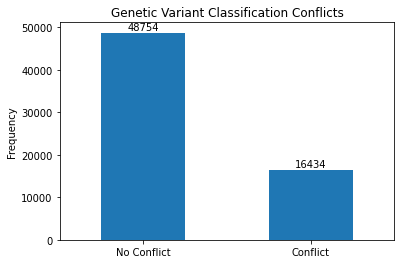

In [5]:
# Graph 1: Show the frequency of genetic variant classification conflicts

ax = data["CLASS"].value_counts().plot.bar(title="Genetic Variant Classification Conflicts")
plt.ylabel("Frequency")
labels = ["No Conflict", "Conflict"]
plt.xticks([0, 1], labels, rotation='horizontal')

# Show the count above each bar
# Adapted from: https://stackoverflow.com/questions/66283061/how-to-add-the-total-count-on-top-of-bar-graph-using-python
for rect in ax.patches:
    y_value = rect.get_height()
    x_value = rect.get_x() + rect.get_width() / 2
    space = 1
    label = "{:.0f}".format(y_value)
    ax.annotate(label, (x_value, y_value), xytext=(0, space), textcoords="offset points", ha='center', va='bottom')
plt.show()

## Distribution of variants by chromosome/organelle

### Chromosome manifests location of variant and play a pivotal role for prediction of genetic variant.There are total 24 types of chromosomes numbered from 1 to 22 and last two named as X and MT


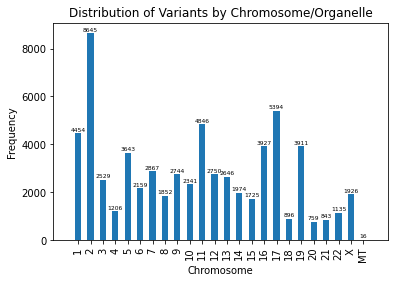

In [6]:
# Graph 2 - Distribution of variants by chromosome/organelle

chromosomes = data['CHROM']

# Clean up data
dict = {}
for c in chromosomes:
    c = str(c)
    if c in dict:
        dict[c] += 1
    else:
        dict[c] = 1

df = pd.DataFrame(columns=['Chromosome', 'Count'])

for key in dict:
    df.loc[len(df.index)] = [key, dict[key]]

# Make the graph look pretty
ax = df.plot.bar(x='Chromosome', width=0.5, legend=False,
                title="Distribution of Variants by Chromosome/Organelle")
ax.margins(.05)
ax.set_xlim([-2, 25])
plt.ylabel("Frequency")

# Show the count above each bar
for rect in ax.patches:
    y_value = rect.get_height()
    x_value = rect.get_x() + rect.get_width() / 2
    space = 1
    label = "{:.0f}".format(y_value)
    ax.annotate(label, (x_value, y_value), xytext=(0, space), 
                textcoords="offset points", ha='center', va='bottom',
                fontsize=6)
plt.show()

## Distribution of Point Mutations

### REF and ALT variables are for capture variant alleles,where they detect genetic variant transistion from REF to ALT referred as Point Substitution Mutations and their pattern of transition is plotted using bar plot

Text(0.5, 1.0, 'Distribution of Point Substitution Mutations')

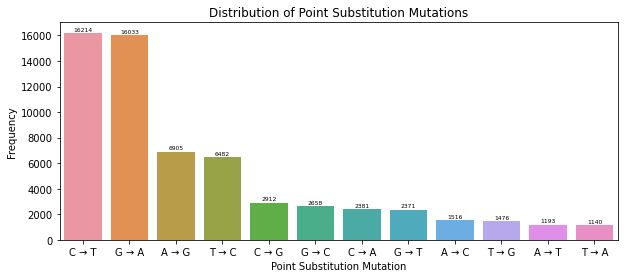

In [7]:
# Graph 3: Distribution of Point Mutations

ref = data['REF']
alt = data['ALT']

# Clean up data (getting rid any lines with multi-base mutations)
dict = {}

for i in range(len(ref)):
    if len(ref[i]) == 1 and len(alt[i]) == 1:
        key = str(ref[i]) + " → " + str(alt[i])
        if key in dict:
            dict[key] += 1
        else:
            dict[key] = 1

df = pd.DataFrame(columns=['Point Substitution Mutation', 'Count'])
for key in dict:
    df.loc[len(df.index)] = [key, dict[key]]

# Plot the data
plt.figure(figsize=(10, 4))

plots = sns.barplot(x='Point Substitution Mutation', y='Count', 
                    data=df, order=df.sort_values('Count', 
                    ascending=False)['Point Substitution Mutation'])

# Show the count above each bar
for rect in plots.patches:
    y_value = rect.get_height()
    x_value = rect.get_x() + rect.get_width() / 2
    space = 1
    label = "{:.0f}".format(y_value)
    plots.annotate(label, (x_value, y_value), xytext=(0, space), 
                textcoords="offset points", ha='center', va='bottom',
                fontsize=6)

# Make the graph look pretty
plt.ylabel("Frequency")
plt.xticks(rotation='horizontal')
plt.title("Distribution of Point Substitution Mutations")


## Forward & Backward Strands

### Strands are categorical classified as Forward Strand and Backward Strand.Their count is depicted by bar plot

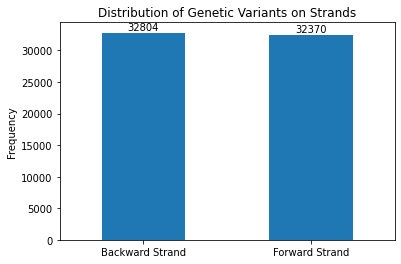

In [8]:
# Graph 4: Forward & Backward Strands

strand = data['STRAND']

ax = strand.value_counts().plot.bar(title="Distribution of Genetic Variants on Strands")
plt.ylabel("Frequency")
labels = ["Backward Strand", "Forward Strand"]
plt.xticks([0, 1], labels, rotation='horizontal')

# Show the count above each bar
for rect in ax.patches:
    y_value = rect.get_height()
    x_value = rect.get_x() + rect.get_width() / 2
    space = 1
    label = "{:.0f}".format(y_value)
    ax.annotate(label, (x_value, y_value), xytext=(0, space), textcoords="offset points", ha='center', va='bottom')
plt.show()


In [9]:
def cleanVariantName(name):
    parts = name.split("&")

    for i in range(len(parts)):
        parts[i] = parts[i].capitalize()
    
    name = ' & '.join(parts)

    name = name.replace("_variant", "")
    parts = name.split('_')
    for i in range(len(parts)):
        parts[i] = parts[i][0].upper() + parts[i][1:]
    
    return ' '.join(parts)


## Top 10 most common variant types

### Most common variant type represented by Consequence column are depicted by horizontal bar plot

Text(0.5, 1.0, 'Top 10 Most Common Variant Types')

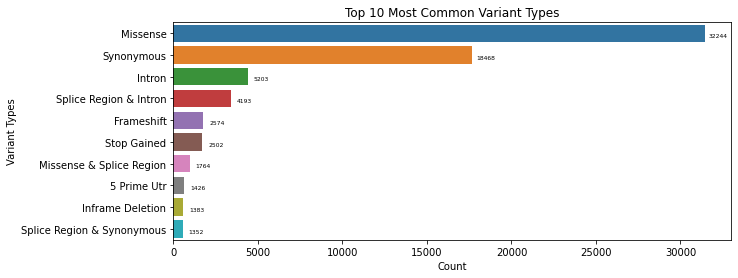

In [10]:

# Graph 5: Top 10 most common variant types

variantTypes = data['Consequence']

# Clean up data and populate df
dict = {}

for i in range(len(variantTypes)):
    key = str(variantTypes[i])
    key = cleanVariantName(key) # Get a cleaner name for the graph
    if key in dict:
        dict[key] += 1
    else:
        dict[key] = 1

df = pd.DataFrame(columns=['Variant Types', 'Count'])
for key in dict:
    df.loc[len(df.index)] = [key, dict[key]]

# Plot the data
plt.figure(figsize=(10, 4))

plots = sns.barplot(x='Count', y='Variant Types', 
                    data=df, 
                    order=df.sort_values('Count', ascending=False).iloc[:10]['Variant Types'])

# Show the count next to each bar
for rect in plots.patches:
    y_value = rect.get_y() + (rect.get_height() / 1.2)
    x_value = rect.get_width() + 800
    space = 1
    label = "{:.0f}".format(x_value)
    plots.annotate(label, (x_value, y_value), xytext=(0, space), 
                textcoords="offset points", ha='center', va='bottom',
                fontsize=6)

# Make the graph look pretty
plt.ylabel("Variant Types")
plt.xticks(rotation='horizontal')
plt.title("Top 10 Most Common Variant Types")



 ## Correlation Matrix for understanding correlation between AF_ESP,AF_EXAC,AF_TGP
 
 ### AF_ESP,AF_EXAC and AF_TGP are variables that capture the allele frequency and correlated with each other.Understanding their correlation would help to dichotomize them into various classes for task of classification

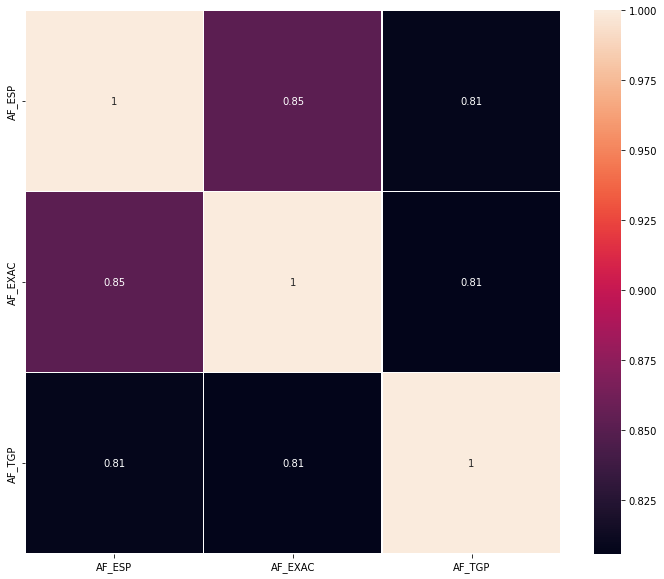

In [11]:
#Graph 6: Correlation Matrix for understanding correlation between AF_ESP,AF_EXAC,AF_TGP
plt.figure(figsize = (12, 10))
sns.heatmap(data[data.columns[3:7]].corr(), annot = True, linewidths=.5)

## Stacked Bar Chart for detection of PolyPhen in four categories 
### PolyPhen prediction score for classification of genetic variant into benign ,damaging and unknown and their respective classification as consistent and conflicting classification. 

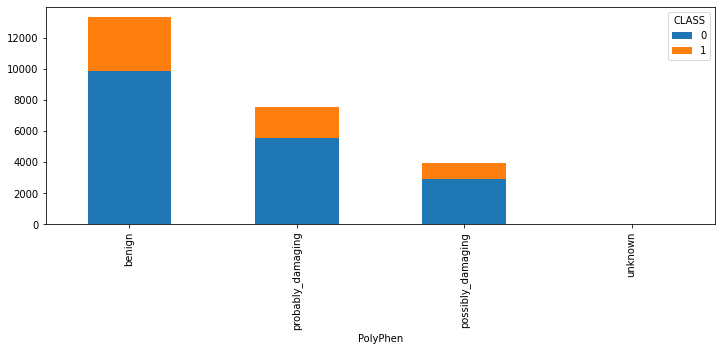

In [12]:
#Graph 7: Stack bar Chart for detection of PolyPhen in four categories 
polyphen_ct = pd.crosstab(data['PolyPhen'], data['CLASS'], margins=True)
polyphen_ct.drop('All', axis=0, inplace=True)

polyphen_ct = polyphen_ct.sort_values(by='All', ascending=False)
polyphen_ct.drop('All', axis=1, inplace=True)

polyphen_ct.plot.bar(stacked=True, figsize=(12, 4));


## Correlation between CADD_PHRED and CADD_RAW with respect to CLASS
### Different scores of deleteriousness are represented by CADD_PHRED and CADD_RAW for given scatter correlation plot with their respective class classification


Text(0.5, 1.0, 'CADD_PHRED vs CADD_RAW Based on Conflicting Classification')

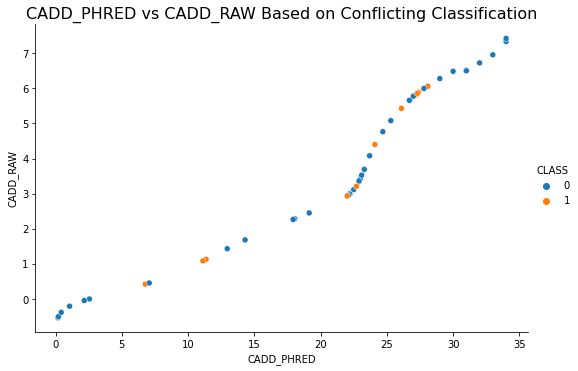

In [13]:
#Graph 8: Correlation between CADD_PHRED and CADD_RAW with respect to CLASS
sns.relplot(data=data.head(50), x='CADD_PHRED', y='CADD_RAW', hue='CLASS', height=5, aspect=1.5)
plt.xlabel('CADD_PHRED')
plt.ylabel('CADD_RAW')
plt.title('CADD_PHRED vs CADD_RAW Based on Conflicting Classification', fontsize=16)

## Top 15 most common gene SYMBOL
### We have plotted top 15 gene symbols present in our dataset.In our given dataset,'TTN' is most used gene symbol for problem of genetic variant classification problem

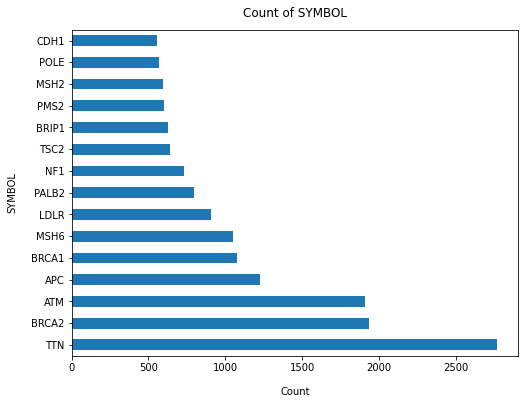

In [14]:
# Graph 9: Top 15 most common SYMBOL
data['SYMBOL'].value_counts().nlargest(15).plot(kind='barh', figsize=(8, 6))
plt.xlabel("Count", labelpad=14)
plt.ylabel("SYMBOL", labelpad=14)
plt.title("Count of SYMBOL", y=1.02);


## WordCloud Representation of Diseases

### CLNDN using the identifiers from CLNDISDB is important metric for disease name identification.Here,we have cleaned and processed CLNDN column to generate wordcloud of top 100 disease responsible for genetic variant classification.

In [15]:
!pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


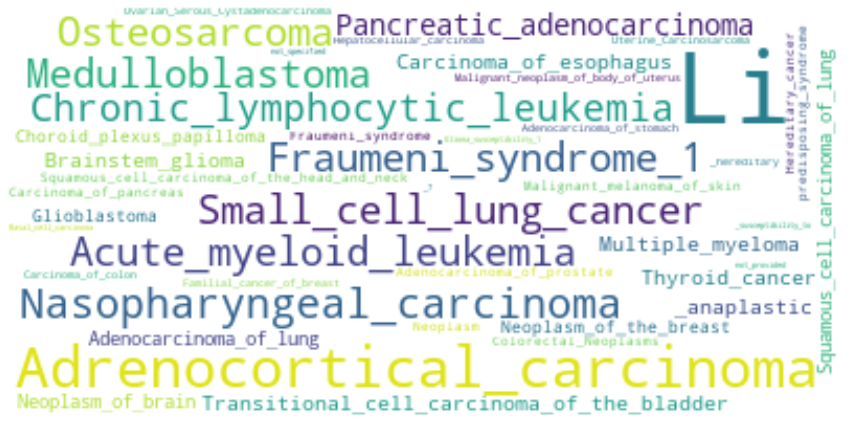

In [16]:
# Graph 10 : WordCloud Representation of Diseases

from wordcloud import WordCloud
from wordcloud import ImageColorGenerator
from wordcloud import STOPWORDS
disease_names = data['CLNDN'].str.split(pat = '|', expand = True)
disease_names.head()
top_100_disease = disease_names.apply(pd.value_counts).sum(axis=1).sort_values(ascending = False)
top_100_disease_tmp = disease_names.value_counts()[:100].index.tolist()
top_100_disease_list = []
for i in range(len(top_100_disease_tmp[0])):
  top_100_disease_list.append(str(top_100_disease_tmp[0][i]))


text = " ".join(i for i in top_100_disease_list)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## Loss of Function tolerance score for loss of function variants depicted using Histogram

###  Loss of Function tolerance score derived from loss of function variants is indicative of fact that most Loss of Function tolerance score lie in range of 0-0.2 rather than having erratic distribution 

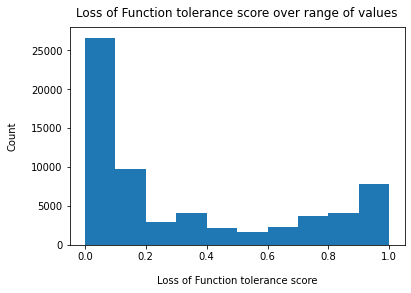

In [17]:
# Graph 11 : Loss of Function tolerance score for loss of function variants depicted using Histogram
data['LoFtool'].fillna(data['LoFtool'].median(), inplace=True)
plt.hist(data['LoFtool'])
plt.xlabel("Loss of Function tolerance score", labelpad=14)
plt.ylabel("Count", labelpad=14)
plt.title("Loss of Function tolerance score over range of values", y=1.02);

## Impact type/intensity for the top 10 variants

### Plot demonstrates impact of particular genetic variants derived through consequence column 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


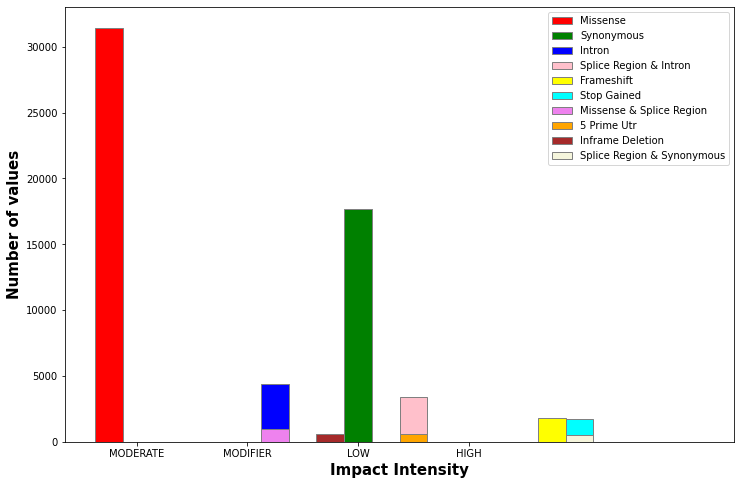

In [18]:
# Graph 12: Impact type/intensity for the top 10 variants
import numpy as np
df_impact = data[['Consequence','IMPACT']]
df_impact['Consequence'] = df_impact['Consequence'].apply(lambda x: cleanVariantName(x))

sorted_df = df.sort_values('Count', ascending=False)
sorted_df.reset_index(inplace=True)

categories = df_impact['IMPACT'].unique()

# print(sorted_df)
category_list = []

for var_num in range(10):
  current_variant = sorted_df['Variant Types'].iloc[var_num]
  variant_impact = df_impact.loc[df_impact['Consequence'] == current_variant,'IMPACT']
  my_list = []
  # print(variant_impact)
  for impact_category in categories: 
    my_list.append(variant_impact.loc[variant_impact == impact_category].count())
  category_list.append(my_list)

barWidth = 0.25
fig = plt.subplots(figsize =(12, 8))

br1 = np.arange(len(categories))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
br4 = [x + barWidth for x in br3]
br5 = [x + barWidth for x in br4]
br6 = [x + barWidth for x in br5]
br7 = [x + barWidth for x in br6]
br8 = [x + barWidth for x in br7]
br9 = [x + barWidth for x in br8]
br10 = [x + barWidth for x in br9]

# Make the plot
plt.bar(br1, category_list[0], color ='r', width = barWidth,
        edgecolor ='grey', label = sorted_df['Variant Types'].iloc[0])
plt.bar(br2, category_list[1], color ='g', width = barWidth,
        edgecolor ='grey', label = sorted_df['Variant Types'].iloc[1])
plt.bar(br3, category_list[2], color ='b', width = barWidth,
        edgecolor ='grey', label = sorted_df['Variant Types'].iloc[2])
plt.bar(br4, category_list[3], color ='pink', width = barWidth,
        edgecolor ='grey', label = sorted_df['Variant Types'].iloc[3])
plt.bar(br5, category_list[4], color ='yellow', width = barWidth,
        edgecolor ='grey', label = sorted_df['Variant Types'].iloc[4])
plt.bar(br6, category_list[5], color ='cyan', width = barWidth,
        edgecolor ='grey', label = sorted_df['Variant Types'].iloc[5])
plt.bar(br7, category_list[6], color ='violet', width = barWidth,
        edgecolor ='grey', label = sorted_df['Variant Types'].iloc[6])
plt.bar(br8, category_list[7], color ='orange', width = barWidth,
        edgecolor ='grey', label = sorted_df['Variant Types'].iloc[7])
plt.bar(br9, category_list[8], color ='brown', width = barWidth,
        edgecolor ='grey', label = sorted_df['Variant Types'].iloc[8])
plt.bar(br10, category_list[9], color ='beige', width = barWidth,
        edgecolor ='grey', label = sorted_df['Variant Types'].iloc[9])
 
# Adding Xticks
plt.xlabel('Impact Intensity', fontweight ='bold', fontsize = 15)
plt.ylabel('Number of values', fontweight ='bold', fontsize = 15)
plt.xticks([r + barWidth for r in range(len(categories))],
        ['MODERATE', 'MODIFIER', 'LOW', 'HIGH'])
 
plt.legend()
plt.show()


In [19]:
#Are there any features with lots of missing values? 

In [20]:
#Assigning dummy variables to categorical variables 

               CHROM       POS    AF_ESP   AF_EXAC    AF_TGP    ORIGIN  \
CHROM       1.000000 -0.499533 -0.015885 -0.018427 -0.012811  0.010993   
POS        -0.499533  1.000000  0.007003  0.007721  0.004225  0.013645   
AF_ESP     -0.015885  0.007003  1.000000  0.851870  0.807741 -0.013563   
AF_EXAC    -0.018427  0.007721  0.851870  1.000000  0.805634 -0.013432   
AF_TGP     -0.012811  0.004225  0.807741  0.805634  1.000000 -0.014450   
ORIGIN      0.010993  0.013645 -0.013563 -0.013432 -0.014450  1.000000   
CLASS      -0.011349  0.012061 -0.126538 -0.121213 -0.130077  0.004357   
STRAND      0.041986 -0.122896 -0.011551 -0.013358 -0.014002 -0.007564   
LoFtool    -0.169277  0.258381  0.024530  0.023114  0.025189 -0.028632   
CADD_PHRED -0.004917 -0.005409 -0.164169 -0.154891 -0.167057  0.060290   
CADD_RAW    0.001334 -0.009753 -0.148118 -0.140803 -0.150989  0.064609   
BLOSUM62   -0.030295  0.022451  0.039367  0.038996  0.043167 -0.012681   

               CLASS    STRAND   LoFt

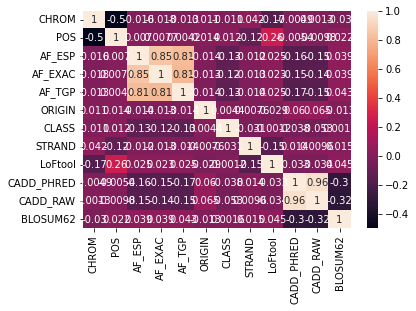

In [33]:
#Creating an initial correlation matrix
corr_matrix = data.corr()
print(corr_matrix)
sns.heatmap(corr_matrix, annot=True)
plt.show()

In [22]:
data.loc[:, 'CHROM'].replace('X', 23, inplace=True)
data.loc[:, 'CHROM'].replace('MT', 24, inplace=True)
data.loc[:, 'CHROM'] = data.CHROM.astype(int)
data['CHROM'].value_counts()

2     8645
17    5394
11    4846
1     4454
16    3927
19    3911
5     3643
7     2867
12    2750
9     2744
13    2646
3     2529
10    2341
6     2159
14    1974
23    1926
8     1852
15    1725
4     1206
22    1135
18     896
21     843
20     759
24      16
Name: CHROM, dtype: int64

In [23]:
data.loc[data['REF'] == "A", "REF"] = 1
data.loc[data['REF'] == "T", "REF"] = 2
data.loc[data['REF'] == "G", "REF"] = 3
data.loc[data['REF'] == "C", "REF"] = 4
# data.loc[:, 'REF'] = data.REF.astype(int)
data.loc[:, 'REF'].unique()
# data['REF'].value_counts()
# data['REF']

array([3, 1, 2, 4, 'CAG', 'GCCCTCCTCTGAGTCTTCCTCCCCTTCCCGTA', 'AG',
       'TTCCTCC', 'TTCC', 'CTT', 'CAGACCGCAGGCTGGAGACCA',
       'AACACCCGCAAGAAGCCGGTAGTCT', 'CCAGGCTGGGGAAG', 'TAGAG', 'TG', 'TC',
       'GGAAGAA', 'ATGAGG', 'TACTA', 'AC', 'CG', 'CT', 'TA',
       'AGCCGCCGCCAGCCGCAGCCATGGGCCGGGCCCGGCCGGGCCAACGCGGGCCGCCCAGCCCCGGCCCCGCCGCGCAGCCTCCCGCGCCACCGC',
       'CCCCGCCGCCGCCAGCAGCCTGGGCAA', 'GA', 'CCA', 'TACG',
       'GCCTGCACAAGGA', 'CTAAAGT', 'TGGAGGGAG', 'TT', 'CCT',
       'AGACCGAAAGAAATTATCCAGGACTTGCTGGCCCATGCGGGGCTTTTTCC', 'TGTTG',
       'CAAG', 'GTAGTGCC', 'AT', 'AGGTCACGGACG', 'GC', 'CAA',
       'TAGCCCAGGCC', 'TCCTATTTCCCCTA', 'CCCAA', 'CAGA',
       'GAACCCTGCAAAAAGTGACACTATC', 'ACTG', 'TTTG', 'TTTAA', 'AAAG',
       'GAAGT', 'ATGAC', 'GTTGCAATGGGAGC', 'CAGTT', 'TTTTG', 'TAGA',
       'GAGA', 'AGAG', 'AGAGGAG', 'CAGG', 'TGGA', 'CAGAG', 'CAGAGAGAGAG',
       'GTGCCCCAGGGCCAAC', 'GGT', 'AAC', 'AGCGCACCGTCTTT', 'TAGAC', 'TGA',
       'GAAAAA', 'CCATCAT', 'CCAT', 'G

In [24]:
data['CLNVC'].unique()

array(['single_nucleotide_variant', 'Deletion', 'Duplication', 'Indel',
       'Inversion', 'Insertion', 'Microsatellite'], dtype=object)

In [25]:
#Dummy variables for CLNVC feature, arbitrary assignment of 0,1,2,3,4,5,6 for the different variant types

data.loc[data['CLNVC'] == "single_nucleotide_variant", "CLNVC"] = 0
data.loc[data['CLNVC'] == "Deletion", "CLNVC"] = 1
data.loc[data['CLNVC'] == "Duplication", "CLNVC"] = 2
data.loc[data['CLNVC'] == "Indel", "CLNVC"] = 3
data.loc[data['CLNVC'] == "Inversion", "CLNVC"] = 4
data.loc[data['CLNVC'] == "Insertion", "CLNVC"] = 5
data.loc[data['CLNVC'] == "Microsatellite", "CLNVC"] = 6

data['CLNVC'].unique()


array([0, 1, 2, 3, 4, 5, 6], dtype=object)

In [26]:
data['IMPACT'].unique()

array(['MODERATE', 'MODIFIER', 'LOW', 'HIGH'], dtype=object)

In [27]:
#Dummy variables for IMPACT feature 
data['IMPACT'].unique()

data.loc[data['IMPACT'] == "MODERATE", "IMPACT"] = 0
data.loc[data['IMPACT'] == "MODIFIER", "IMPACT"] = 1
data.loc[data['IMPACT'] == "LOW", "IMPACT"] = 2
data.loc[data['IMPACT'] == "HIGH", "IMPACT"] = 3

data['IMPACT'].unique()

array([0, 1, 2, 3], dtype=object)

In [41]:
data['PolyPhen'] = data['PolyPhen'].replace({'benign':1, 'probably_damaging':2, 'possibly_damaging' : 3})

In [42]:
data['PolyPhen']

0          1
1          1
2          2
3        NaN
4        NaN
        ... 
65183    NaN
65184      1
65185    NaN
65186    NaN
65187    NaN
Name: PolyPhen, Length: 65188, dtype: object

## Machine learning

In [28]:
import numpy as np

from scipy.stats import uniform, randint

from sklearn.datasets import load_breast_cancer, load_diabetes, load_wine
from sklearn.metrics import auc, accuracy_score, confusion_matrix, mean_squared_error
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold, RandomizedSearchCV, train_test_split

import xgboost as xgb

In [29]:
def display_scores(scores):
    print("Scores: {0}\nMean: {1:.3f}\nStd: {2:.3f}".format(scores, np.mean(scores), np.std(scores)))

In [30]:
def report_best_scores(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")

In [39]:
# convert_feature = ['REF', 'ALT', 'CLNDISDB', 'CLNDN', 'CLNHGVS', 'CLNVC', 'CLNVI', 'MC', 'Allele', 'Consequence', 'IMPACT', 'SYMBOL', 'Feature_type', 'Feature', 'BIOTYPE', 'EXON', 'cDNA_position', 'CDS_position', 'Protein_position', 'Amino_acids', 'Codons', 'BAM_EDIT', 'SIFT', 'PolyPhen']
# for i in range(len(convert_feature)):
#   data[convert_feature[i]] = data[convert_feature[i]].astype(int)

ValueError: ignored

In [40]:
cancer = data

X = data.drop(columns=['CLASS'])
y = data['CLASS']

xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=42)
xgb_model.fit(X, y)

y_pred = xgb_model.predict(X)

print(confusion_matrix(y, y_pred))

ValueError: ignored